In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
titanic = sns.load_dataset('titanic')

In [4]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
titanic.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
titanic.dropna().describe()

,survived,pclass,age,sibsp,parch,fare
count,182.000000,182.000000,182.000000,182.000000,182.000000,182.000000
mean,0.675824,1.192308,35.623187,0.467033,0.478022,78.919735
std,0.469357,0.516411,15.671615,0.645007,0.755869,76.490774
min,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,1.000000,1.000000,47.750000,1.000000,1.000000,90.000000
max,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [7]:
titanic.var()
# 수치값들이 어떤식으로 가지는지

survived         0.236772
pclass           0.699015
age            211.019125
sibsp            1.216043
parch            0.649728
fare          2469.436846
adult_male       0.239723
alone            0.239723
dtype: float64

In [8]:
titanic.mad()
# 민 엡솔루트 데비에이션

survived       0.473013
pclass         0.761968
age           11.322944
sibsp          0.713780
parch          0.580742
fare          28.163692
adult_male     0.478908
alone          0.478908
dtype: float64

In [9]:
titanic.groupby('class').count()
# 클래스별로 몇명이나 탓지
# 일등급> 3등급>2등급

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,216,216,216,186,216,216,216,214,216,216,175,214,216,216
Second,184,184,184,173,184,184,184,184,184,184,16,184,184,184
Third,491,491,491,355,491,491,491,491,491,491,12,491,491,491


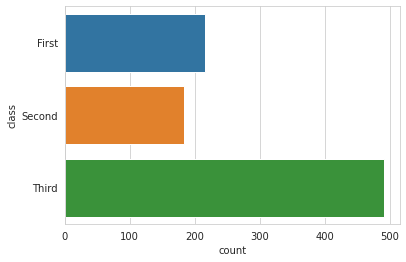

In [10]:
sns.countplot(y='class',data=titanic)
# 3등급이 가장 많다

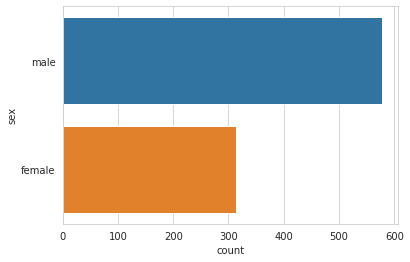

In [11]:
sns.countplot(y='sex',data=titanic)
# 성별을 보니 남자가 여자보다 많이 탐

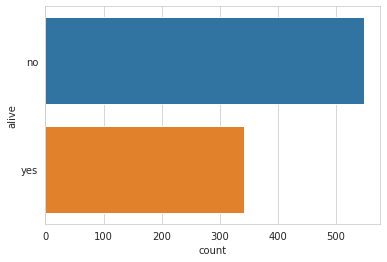

In [12]:
sns.countplot(y='alive',data=titanic)
# 생존 못한 사람이 많네

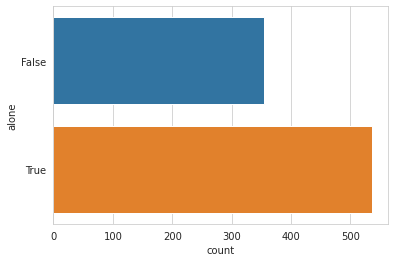

In [13]:
sns.countplot(y='alone',data=titanic)
# 혼자온사람이 더 많네

In [14]:
titanic.groupby('class').std()
# 클래스 별에 따라서 std를 볼게

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.498555,0.501140
Second,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.499911,0.497081
Third,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.477552,0.474233


In [15]:
titanic.groupby('class')['fare'].median()
# 확실이 1등급이 비싸네

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [16]:
titanic.query('alive == "yes"')
# 살아있는사람이 yes인 사람
# 너무 많네

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
875,1,3,female,15.0,0,0,7.2250,C,Third,child,False,NaN,Cherbourg,yes,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
880,1,2,female,25.0,0,1,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [17]:
titanic.query('alive == "yes"').groupby('class').count()
#클래스 별로 생존자를 보고 count를 해볼게

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone
class,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119


In [18]:
titanic.groupby('class')['age'].describe()

# 1등급은 나이는 38
# 2등급은 29세 등등..
# 엄청 어린 0.92도 잇엇고
# 늦은 80세도 잇엇고
# describe()로 확인 가능

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
First,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
Second,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
Third,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


In [19]:
titanic.query('alive == "yes"').groupby('class').describe()

survived                 ...      fare                               
          count mean  std  min  ...       25%      50%         75%       max
class                           ...                                         
First     136.0  1.0  0.0  1.0  ...  50.98545  77.9583  111.481225  512.3292
Second     87.0  1.0  0.0  1.0  ...  13.00000  21.0000   26.250000   65.0000
Third     119.0  1.0  0.0  1.0  ...   7.77500   8.5167   15.875000   56.4958

[3 rows x 48 columns]

In [20]:
# 계속 질문을 해나갖
titanic.groupby('sex')['age'].aggregate([min, np.median, max])
# female 쪽이 나이가 평군이 2살 어리고 최고령이 63


,min,median,max
sex,,,
female,0.75,27.0,63.0
male,0.42,29.0,80.0


In [21]:
titanic.query('age > 30').groupby('class').median()
# 30세인 초과인 사람들의 평균 나이를 클래스 별로 구분함


,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1,1,45.0,0,0,56.9292,True,False
Second,0,2,39.0,0,0,14.0000,True,True
Third,0,3,38.0,0,0,8.0500,True,True


In [22]:
titanic.query('fare < 20').groupby('class').median()

#1등급은 20파운드 이하는 1등급을 살수가 없네요

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0,1,38.5,0,0,0.0000,True,True
Second,0,2,30.0,0,0,13.0000,True,True
Third,0,3,25.0,0,0,7.8958,True,True


In [23]:
titanic.groupby(['class','sex'])['age'].mean().unstack()

# 확실히 남자가 나이가 좀더 많은 것을 알수 있지

sex,female,male
class,,
First,34.611765,41.281386
Second,28.722973,30.740707
Third,21.750000,26.507589


In [50]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


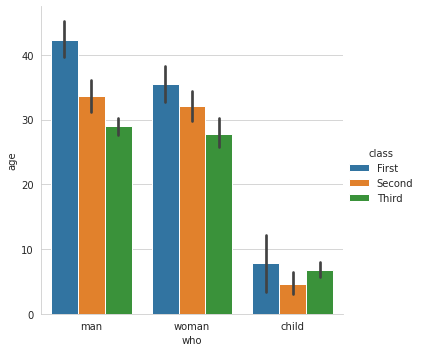

In [51]:
sns.catplot(x = 'sex', y = 'age',
            hue = 'class', kind = 'bar',
            data =titanic);

            # 확실히 설별에 따라 남자의 나이대가 많은걸 볼수잇다

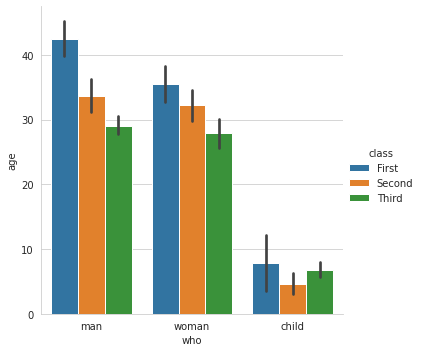

In [25]:
sns.catplot(x = 'who', y = 'age',
            hue = 'class', kind = 'bar',
            data =titanic);

            #who 로바꾸면 child 까지 볼수 있따

In [26]:
titanic.groupby(['class','sex'])['fare'].mean().unstack()

#운임비용은 어떨가요
#여자가 더 많이 내군요

sex,female,male
class,,
First,106.125798,67.226127
Second,21.970121,19.741782
Third,16.118810,12.661633


In [27]:
titanic.groupby(['class','who'])['fare'].mean().unstack()

#애들이 더비싸네 ㄷㄷ

who,child,man,woman
class,,,
First,139.382633,65.951086,104.317995
Second,28.323905,19.054124,20.868624
Third,23.220190,11.340213,15.354351


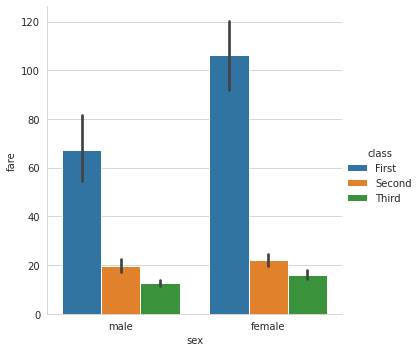

In [28]:
sns.catplot(x = 'sex', y = 'fare',
            hue = 'class', kind = 'bar',
            data = titanic)

# 확실히 여자가 돈을 많이 냄

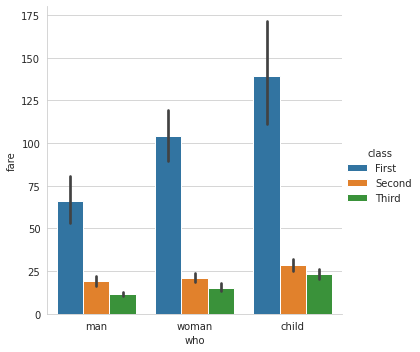

In [29]:
sns.catplot(x = 'who', y = 'fare',
            hue = 'class', kind = 'bar',
            data = titanic)
# 꼬맹이들이 많이 냈네

In [30]:
titanic.groupby(['class', 'sex'])['survived'].mean().unstack()

# 확실히 여자가 많이 생존 했음을 알수있다


sex,female,male
class,,
First,0.968085,0.368852
Second,0.921053,0.157407
Third,0.500000,0.135447


In [31]:
titanic.pivot_table('survived', index = 'class', columns = 'who')

#호옹이 2등급 꼬맹이들은 다 살아났구만

who,child,man,woman
class,,,
First,0.833333,0.352941,0.978022
Second,1.000000,0.080808,0.909091
Third,0.431034,0.119122,0.491228


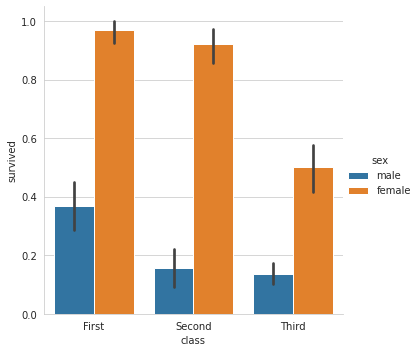

In [32]:
sns.catplot(x = 'class', y = 'survived',
            hue = 'sex', kind = 'bar',
            data = titanic)

# 확실히 여성이 훨신 많이 살았네

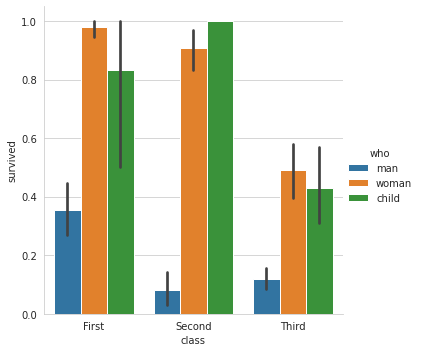

In [33]:
sns.catplot(x = 'class', y = 'survived',
            hue = 'who', kind = 'bar',
            data = titanic)

# 음 그렇구나

In [34]:
# 계속 질문해 이데이터가 뭘 가지고 있는지

age = pd.cut(titanic['age'], [0,18,40,80])
titanic.pivot_table('survived', ['sex',age],'class')

#여자 1,2등급 어린친구드른 거의 구출됐네 3등급도 뭐..늦은분들도 거義



class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [35]:
age = pd.cut(titanic['age'], [0,18,40,80])
titanic.pivot_table('survived', ['who',age],'class')

# ㅇ린이는 018에만 포함되어잇고 같네요 값이 위랑


class              First    Second     Third
who   age                                   
child (0, 18]   0.833333  1.000000  0.431034
man   (0, 18]   0.500000  0.000000  0.086957
      (18, 40]  0.478261  0.063492  0.146199
      (40, 80]  0.280000  0.095238  0.064516
woman (0, 18]   1.000000  1.000000  0.461538
      (18, 40]  0.979167  0.914894  0.480000
      (40, 80]  0.961538  0.846154  0.111111

In [36]:
fare = pd.qcut(titanic['fare'],3)
titanic.pivot_table('survived', ['who',age],[fare, 'class'])


# 운임 비용이 적으면 탈수도 없지 1등급ㅇ도
# 운임 비용에 대한 차이엔 클레스가 구분이 되서 그런지 뭐 딱히 
# 발견한게 없네

fare           (-0.001, 8.662]            ... (26.0, 512.329]      
class                    First     Third  ...          Second Third
who   age                                 ...                      
child (0, 18]              NaN  0.666667  ...             1.0  0.08
man   (0, 18]              NaN  0.125000  ...             0.0  0.00
      (18, 40]             0.0  0.138462  ...             0.0  0.50
      (40, 80]             NaN  0.074074  ...             0.0   NaN
woman (0, 18]              NaN  0.666667  ...             NaN  0.00
      (18, 40]             NaN  0.550000  ...             1.0  0.25
      (40, 80]             NaN  0.000000  ...             1.0  0.00

[7 rows x 8 columns]

In [37]:
titanic.pivot_table('survived',index = 'who',columns = 'class', margins = True)

class,First,Second,Third,All
who,,,,
child,0.833333,1.000000,0.431034,0.590361
man,0.352941,0.080808,0.119122,0.163873
woman,0.978022,0.909091,0.491228,0.756458
All,0.629630,0.472826,0.242363,0.383838


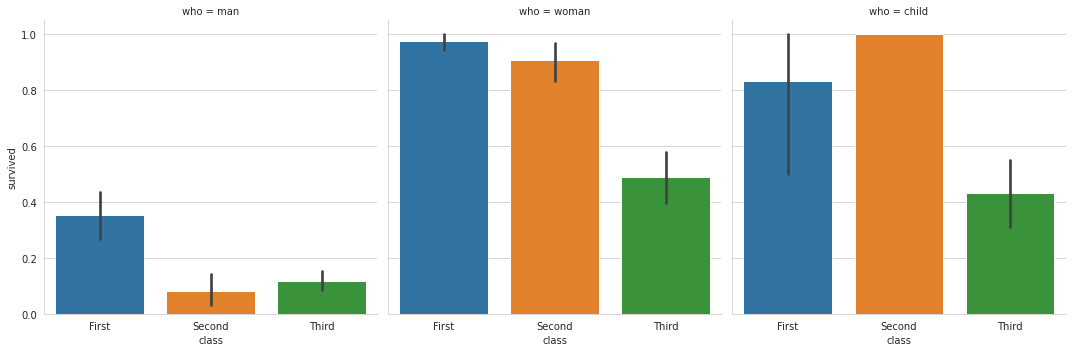

In [38]:
sns.catplot(x = 'class', y = 'survived',
            col = 'who', kind = 'bar',
            data = titanic)

# col로 다 나눠볼게
# 확실히 여자가 많이 생족함

In [39]:
titanic.pivot_table('survived', index = 'deck', columns = 'class',margins = True)

#1등급은 fg없고
# 2등급은 def만 deck 위치가 정해져잇음을 알수잇다

class,First,Second,Third,All
deck,,,,
A,0.466667,NaN,NaN,0.466667
B,0.744681,NaN,NaN,0.744681
C,0.593220,NaN,NaN,0.593220
D,0.758621,0.7500,NaN,0.757576
E,0.720000,0.7500,1.0,0.750000
F,NaN,0.8750,0.2,0.615385
G,NaN,NaN,0.5,0.500000
All,0.668571,0.8125,0.5,0.669951


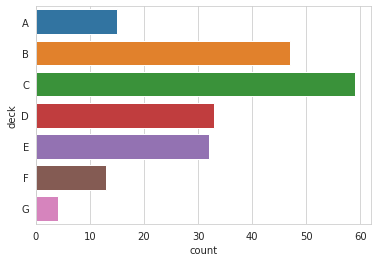

In [40]:
sns.countplot(y = 'deck', data = titanic);

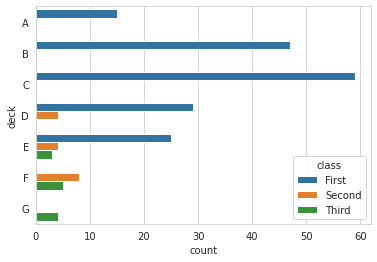

In [41]:
sns.countplot(y = 'deck', hue='class', data = titanic);

# 1등급이 abc에 맣네..

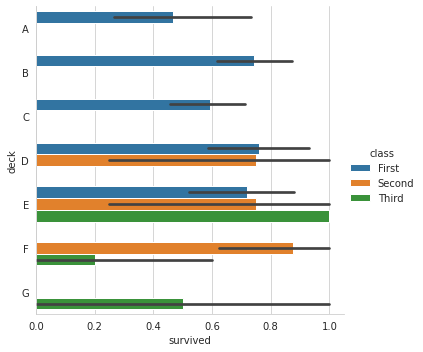

In [42]:
sns.catplot(x = 'survived', y = 'deck',
            hue = 'class', kind = 'bar',
            data = titanic)

# 생존자의 분포
# f,g 쪽이 타격이 크네..  

In [43]:
titanic.pivot_table('survived', index = 'embark_town', columns = 'class', margins = True)

# 어디서 탔는지 생존자를 구붛내보자
# 3군데가 있느넫 별 구분점이 ㅇ안보이네


class,First,Second,Third,All
embark_town,,,,
Cherbourg,0.694118,0.529412,0.378788,0.553571
Queenstown,0.500000,0.666667,0.375000,0.389610
Southampton,0.582677,0.463415,0.189802,0.336957
All,0.626168,0.472826,0.242363,0.382452


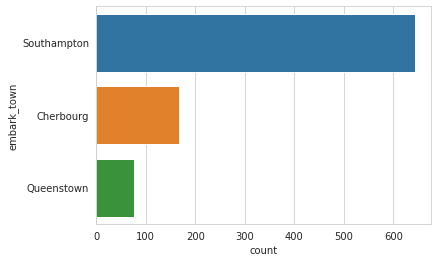

In [44]:
# 잘 안보이니까 시각적으로 라도 확인해보자
sns.countplot(y = 'embark_town', data = titanic)

# 호응이 southampton에서 600이상이 여기서 탓네


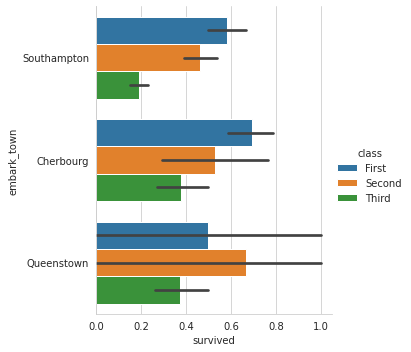

In [45]:
sns.catplot(x = 'survived', y = 'embark_town',
            hue = 'class', kind= 'bar',
            data = titanic)

# 아 별차이가 없네..
# 생존의 여부에는 embark town과 상관 없는걸확인할수잇엇다

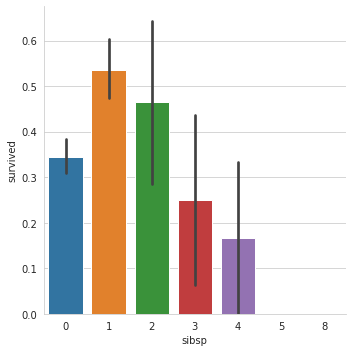

In [46]:
#다른 속성들로 catplot으로 확인해보자
sns.catplot(x = 'sibsp', y = 'survived',
            kind = 'bar', data = titanic)

# 1명 정도 있읏을때가 생존
# 같이 있어야 생존 가능햇나봐

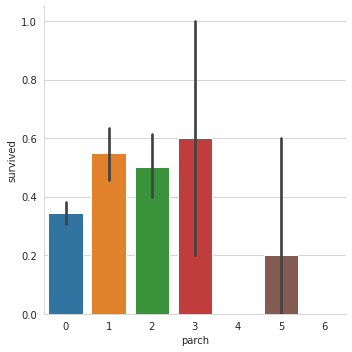

In [47]:
sns.catplot(x = 'parch', y = 'survived',
            kind = 'bar', data = titanic)

# 한두명잇을때 잘 생존
# 근데 3명일때는 분포가 너무 많아서 신뢰성이 없네

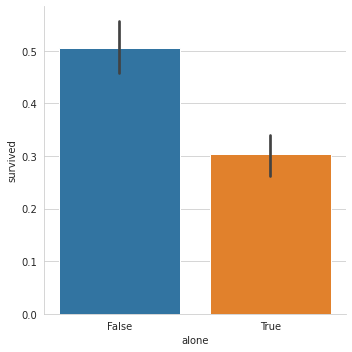

In [48]:
sns.catplot(x = 'alone', y = 'survived',
            kind = 'bar', data = titanic)

# 혼자 있는게 true
# 같이온, 동반자,가족끼리 온게 생존을 더 많이 함
# 혼자 30% , 동반자 50% 이상